# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
StudyData_df = pd.merge(study_results, mouse_metadata, on='Mouse ID')
StudyData_df = StudyData_df.sort_values(by=['Timepoint'])

# Display the data table for preview
StudyData_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1460,w584,0,45.0,0,Infubinol,Male,3,29
1006,p136,0,45.0,0,Zoniferol,Female,5,28
461,a411,0,45.0,0,Ramicane,Male,3,22
1467,b447,0,45.0,0,Ceftamin,Male,2,30


In [4]:
# Checking the number of mice.

#.nunique function used to find the total number of mice in the data set
NumMice = StudyData_df["Mouse ID"].nunique()
#Display number of mice
NumMice

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#.duplicated function used to determine if there are any rows that contain the same 'Mouse ID' AND 'Timepoint'
DupMice_df = StudyData_df[StudyData_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
#All unique Mouse IDs of these rows is displayed
DupMice_df["Mouse ID"].unique()

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID.

#New DataFrame created to hold the data of Mouse ID that has duplicates
g989Dup_df = StudyData_df[StudyData_df['Mouse ID'] == 'g989']
#Display duplicates DataFrame
g989Dup_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#New DataFrame created with all rows of the duplicate data mouse removed (cleaned)
CleanedStudy_df = StudyData_df[StudyData_df['Mouse ID'] != 'g989']
#Display cleaned DataFrame
CleanedStudy_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1460,w584,0,45.0,0,Infubinol,Male,3,29
1006,p136,0,45.0,0,Zoniferol,Female,5,28
461,a411,0,45.0,0,Ramicane,Male,3,22
1467,b447,0,45.0,0,Ceftamin,Male,2,30


In [8]:
# Checking the number of mice in the clean DataFrame.

#.nunique used again to ensure the duplicate entry mouse has been removed properly from the new clean DataFrame
NewNumMice = CleanedStudy_df["Mouse ID"].nunique()
#Display new number
NewNumMice

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#New DataFrame created grouped by 'Drug Regimen'
DrugGrouped_df = CleanedStudy_df.groupby(['Drug Regimen'])

#Summary statistical methods for pandas DataFrames used to determine our desired statistical figures
#.mean function used to determine average of tumor volume (mm3) per group of drug regimen
TumorVolMean = DrugGrouped_df['Tumor Volume (mm3)'].mean()
#print(TumorVolMean)

#Similar is done for median
TumorVolMedian = DrugGrouped_df['Tumor Volume (mm3)'].median()

#Similar is done for variance
TumorVolVar = DrugGrouped_df['Tumor Volume (mm3)'].var()

#Similar is done for standard deviation
TumorVolStanDev = DrugGrouped_df['Tumor Volume (mm3)'].std()

#Similar is done for standard error of the mean
TumorVolSEM = DrugGrouped_df['Tumor Volume (mm3)'].sem()

#New DataFrame is created to hold our previously created data series sets
StudySummaryStats_df = pd.DataFrame({'Mean Tumor Volume' : TumorVolMean,
                           'Median Tumor Volume' : TumorVolMedian,
                           'Tumor Volume Variance': TumorVolVar,
                           'Tumor Volume Std. Dev.' : TumorVolStanDev,
                           'Tumor Volume Std. Err.' : TumorVolSEM}
                         )

#Display DataFrame
StudySummaryStats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

#Using our previously created 'Drug Regimen' grouped DataFrame, aggregate functions are used to find the desired figures
AggSummary_df = DrugGrouped_df['Tumor Volume (mm3)'].agg(['mean','median','var', 'std', 'sem'])
#Display DataFrame
AggSummary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

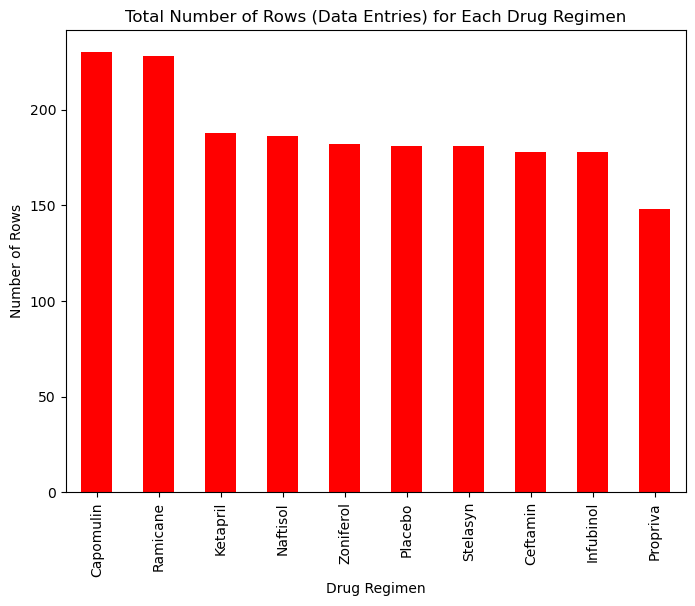

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#The number of rows for each 'Drug Regimen' (all Timepoints) determined using .count function on grouped DataFrame
NumDrugRows_series = DrugGrouped_df.count()['Mouse ID']
#print(NumDrugRows_list)

#Rows count per drug sorted
NumDrugRows_sorted = NumDrugRows_series.sort_values(ascending=False)

#Pandas function .plot is used to generate bar chart 
BarPlot = NumDrugRows_sorted.plot(kind='bar', color='red', figsize=(8, 6))

#Pandas functions used to label plot
BarPlot.set_title('Total Number of Rows (Data Entries) for Each Drug Regimen')
BarPlot.set_xlabel('Drug Regimen')
BarPlot.set_ylabel('Number of Rows')

#Display plot
plt.show()

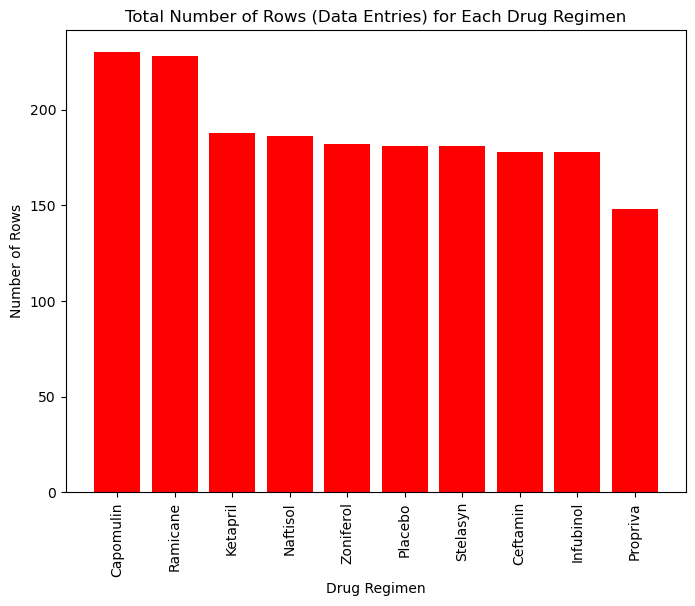

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#The x axis and y axis (values) are set as per previous NumDrugRows_sorted, index function used to determine number of bars
xAxis = NumDrugRows_sorted.index
yValues = NumDrugRows_sorted

#Figure size is set and bar plot produced
plt.figure(figsize=(8, 6))
plt.bar(xAxis, yValues, color='red')

#Label plot using pyplot functions
plt.title('Total Number of Rows (Data Entries) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

#Force our x axis titles to be vertical
plt.xticks(rotation='vertical')

#Display plot
plt.show()

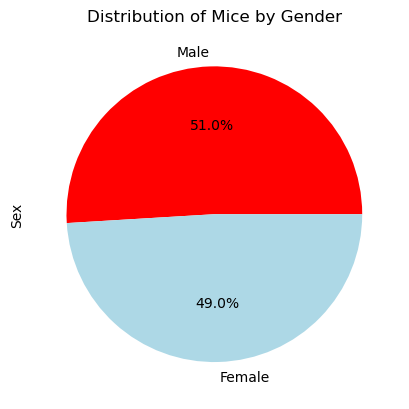

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#Gender distribution determined by using .value_counts on 'Sex' column
GenderCount = CleanedStudy_df['Sex'].value_counts()

#Pie chart is plotted, setting autopct to display exact percentage, setting ylabel to display 'Sex'
GenderCount.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'lightblue'], ylabel="Sex")

#Title added to plot
plt.title('Distribution of Mice by Gender')

#Display plot
plt.show()

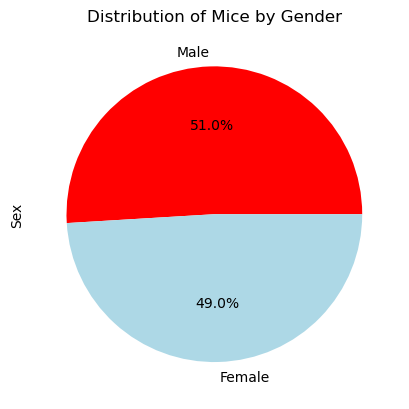

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Plot created with .index function to set the labels, autopct to display exact percentage 
plt.pie(GenderCount, labels=GenderCount.index, autopct='%1.1f%%', colors=['red', 'lightblue'])

#Title added and ylabel set to 'Sex'
plt.title('Distribution of Mice by Gender')
plt.ylabel("Sex")

#Display plot
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Last (greatest) timepoint for each mouse stored in new DataFrame, .max function used on grouped clean DataFrame
LastTimepoints_df = CleanedStudy_df.groupby('Mouse ID')['Timepoint'].max().reset_index() #Must reset index due to previous groupby
#print(LastTimepoints_df)

#New DataFrame merged with original DataFrame to get the tumor volume at the last timepoint
MaxTimepoints_df = LastTimepoints_df.merge(CleanedStudy_df,on=['Mouse ID','Timepoint'], how='left')
MaxTimepoints_df

#testdf = MaxTimepoints_df[MaxTimepoints_df['Tumor Volume (mm3)'] < 37]
#testdf

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
TreatmentList = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
TumorVolList = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

#For loop used to iterate through drug regimens desired
for treatment in TreatmentList:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    #Using previously created DataFrame, we conditionally locate rows for desired drug regimen and return Tumor Vol data
    TumorVolData = MaxTimepoints_df.loc[MaxTimepoints_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset
    #Once located, we add this data to our list for this drug regimen
    TumorVolList.append(TumorVolData)

    #.quantile function used to determine our lower and upper quartiles
    Quartiles = TumorVolData.quantile([0.25, 0.5, 0.75])
    #From the quartiles series, lower and upper quartiles are extracted
    LowQuartile = Quartiles[0.25]
    UpperQuartile = Quartiles[0.75]
    #Inter quartile range calculated
    IQR = UpperQuartile - LowQuartile

    # Determine upper and lower bounds to identify potential outliers
    LowerBound = LowQuartile - 1.5 * IQR
    UpperBound = UpperQuartile + 1.5 * IQR

    #Outliers are determined in our tumor volume list
    Outliers = TumorVolData[(TumorVolData < LowerBound) | (TumorVolData > UpperBound)]

    #Display any outliers identified
    print(f"{treatment}'s potential outliers: {Outliers}")
    
    #End for loop

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


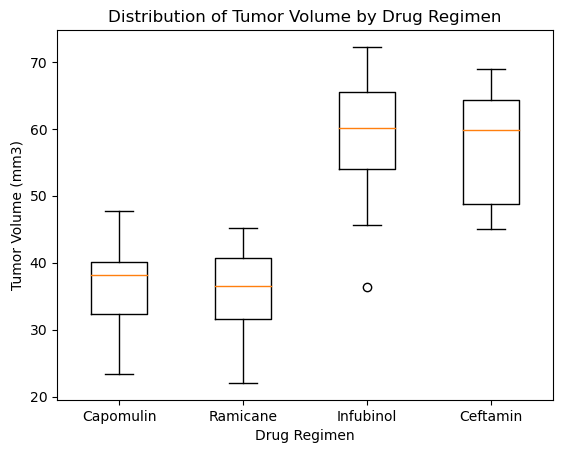

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

#Boxplot created using created data
plt.boxplot(TumorVolList, labels=TreatmentList)

#Titles and axis labels added
plt.title('Distribution of Tumor Volume by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

#Display plot
plt.show()

## Line and Scatter Plots

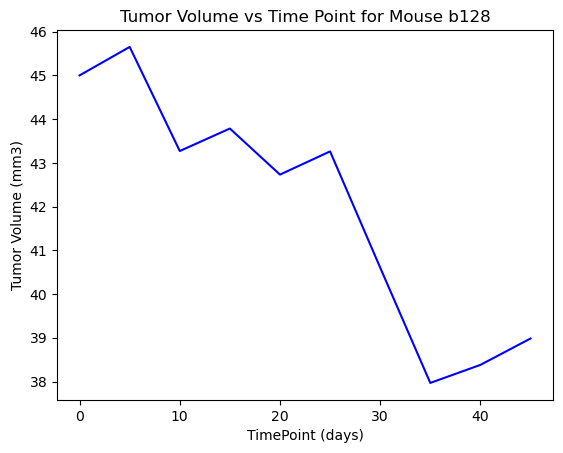

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#String to hold which mouse we would like to plot is defined and can be changed
PlotMouseID = 'b128'

#Data for mouse stored in new DataFrame by filtering whole cleaned dataframe for our desired mouse id and drug regimen
PlotMouseData_df = CleanedStudy_df[(CleanedStudy_df['Drug Regimen'] == 'Capomulin') & (CleanedStudy_df['Mouse ID'] == PlotMouseID)]

#Line plot generated using data
xAxis = PlotMouseData_df['Timepoint']
YData = PlotMouseData_df['Tumor Volume (mm3)']
plt.plot(xAxis, YData, color='blue')

#Title and labels added to plot
plt.title(f'Tumor Volume vs Time Point for Mouse {PlotMouseID}')
plt.xlabel('TimePoint (days)')
plt.ylabel('Tumor Volume (mm3)')

#Display plot
plt.show()

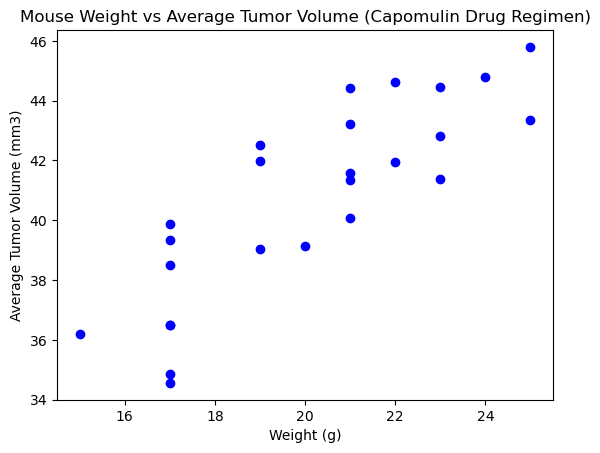

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#Create new DataFrame containing only capomulin data
CapomulinData_df = CleanedStudy_df[CleanedStudy_df['Drug Regimen'] == 'Capomulin']

#Average tumor volume for these rows calculated and stored in a new series, capomulin DataFrame has to be grouped by mouse id
AvgTumorVol = CapomulinData_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

#To put mouse weight back in, merge with data contained in Mouse_metadata.csv
CapomulinMerged_df = pd.merge(AvgTumorVol, mouse_metadata, on='Mouse ID')
#print(CapomulinMerged_df)

#Scatter plot is created with weight and tumor volume data
xAxis = CapomulinMerged_df['Weight (g)']
yData = CapomulinMerged_df['Tumor Volume (mm3)']
plt.scatter(xAxis, yData, color='blue')

#Title and axis labels added
plt.title('Mouse Weight vs Average Tumor Volume (Capomulin Drug Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

#Display plot
plt.show()

## Correlation and Regression

Correlation Coefficient between mouse weight and the average tumor volume: 0.84


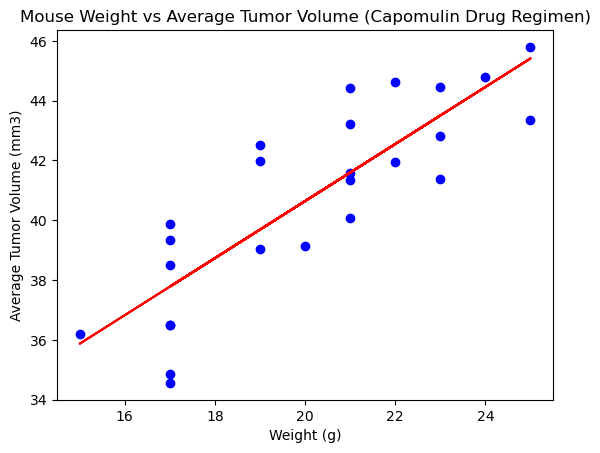

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#Correlation coefficient calculated using .corr function
CorrelationCoefficient = CapomulinMerged_df['Weight (g)'].corr(CapomulinMerged_df['Tumor Volume (mm3)'])

#scipy linear regression performed
slope, intercept, r_value, p_value, std_err = st.linregress(CapomulinMerged_df['Weight (g)'], CapomulinMerged_df['Tumor Volume (mm3)'])

#Scatter plot created
xAxis = CapomulinMerged_df['Weight (g)']
yData = CapomulinMerged_df['Tumor Volume (mm3)']
plt.scatter(xAxis, yData, color='blue')

#Linear regression calculated and plotted on top
RegressionLine = slope * xAxis + intercept
plt.plot(xAxis, RegressionLine, color='red')

#Title and axis labels added
plt.title('Mouse Weight vs Average Tumor Volume (Capomulin Drug Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

#Print out correlation coefficient
print(f'Correlation Coefficient between mouse weight and the average tumor volume: {CorrelationCoefficient:.2f}')

#Display plot
plt.show()